## Assignment 2 -- ML 1

## `Telco Customer Churn `
**The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.**

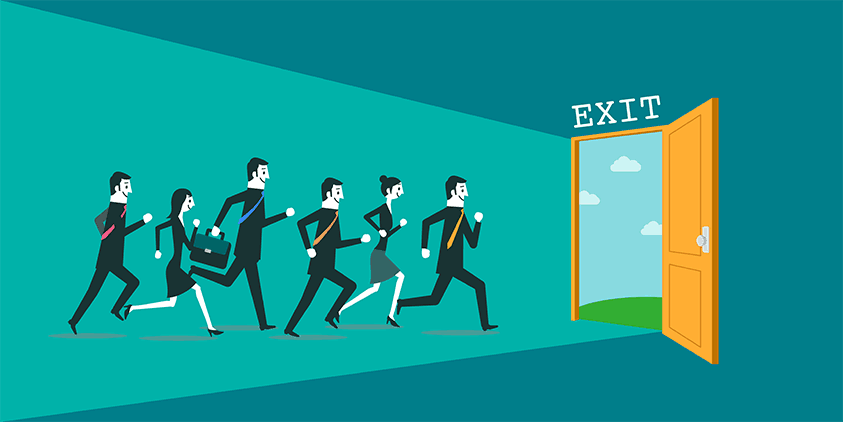

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve 

### `load data`

In [2]:
# load data
df = pd.read_csv('E:\iti\machine learning\Customer churn proj\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df.iloc[:, 1:]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### `convert TotalCharges feature from 'object' to 'numeric' feature`

In [4]:
## this is numerical but contains some nulls so it leads to be an object
## fill null with Nans and convert to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')      # errors='coerce' ==> will set invalid parsing with as (Nan) 
#df.isnull().sum().sort_values(ascending=False)

In [5]:
df.info() # look at dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### `there are 11 spaces [not defined values]:`

In [6]:
df.isnull().sum().sort_values(ascending=False)

TotalCharges        11
Churn                0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
gender               0
dtype: int64

#### `Removing missing values`

In [7]:
df.dropna(inplace = True)

#### `Checking there is Nan`

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### `check for unique values in object columns`

In [9]:
for col in df.columns:
    if df[col].dtype=='object':
        print(f'column name is "{col}" \n', df[col].unique())
        print('==='*15)

column name is "gender" 
 ['Female' 'Male']
column name is "Partner" 
 ['Yes' 'No']
column name is "Dependents" 
 ['No' 'Yes']
column name is "PhoneService" 
 ['No' 'Yes']
column name is "MultipleLines" 
 ['No phone service' 'No' 'Yes']
column name is "InternetService" 
 ['DSL' 'Fiber optic' 'No']
column name is "OnlineSecurity" 
 ['No' 'Yes' 'No internet service']
column name is "OnlineBackup" 
 ['Yes' 'No' 'No internet service']
column name is "DeviceProtection" 
 ['No' 'Yes' 'No internet service']
column name is "TechSupport" 
 ['No' 'Yes' 'No internet service']
column name is "StreamingTV" 
 ['No' 'Yes' 'No internet service']
column name is "StreamingMovies" 
 ['No' 'Yes' 'No internet service']
column name is "Contract" 
 ['Month-to-month' 'One year' 'Two year']
column name is "PaperlessBilling" 
 ['Yes' 'No']
column name is "PaymentMethod" 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column name is "Churn" 
 ['No' 'Yes']


### `count and drop duplicates`

In [10]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

22


### `return skewness per Numeric feature:`

In [11]:
df.skew()

SeniorCitizen     1.827450
tenure            0.233740
MonthlyCharges   -0.225686
TotalCharges      0.958322
dtype: float64

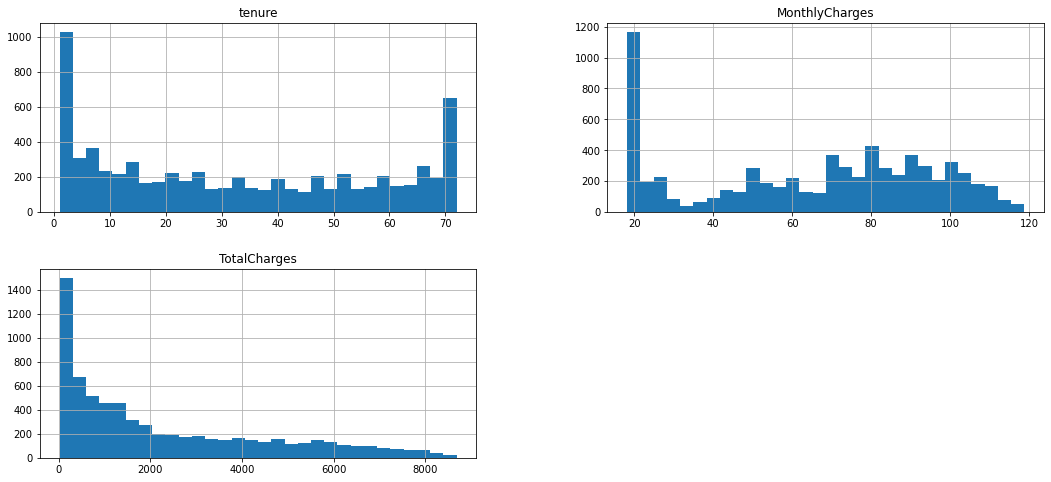

In [12]:
# tenure and MonthlyCharges and TotalCharges historam ditribution
## Note --> i will remove (SeniorCitizen) as it is categorical and encoded not a numerical value to be work on

df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(18, 8));

### `using Box-cox`

Lambda value used for Transformation: 0.25537409875188244


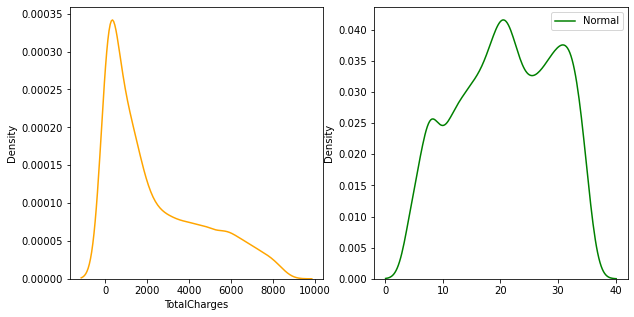

In [13]:
# using Box-cox to transform skewed data to Normal distributed data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

skewed_features = ['TotalCharges']

for i in skewed_features:
    
    original_data = df[i]

    # transform training data & save lambda value
    fitted_data, fitted_lambda = stats.boxcox(original_data)

    # creating axes to draw plots
    fig, ax = plt.subplots(1, 2)

    # plotting the original data(non-normal) and 
    # fitted data (normal)
    sns.kdeplot(original_data, label = "Non-Normal", color ="Orange", ax = ax[0])

    sns.kdeplot(fitted_data, label = "Normal", color ="green", ax = ax[1])

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)

    print(f"Lambda value used for Transformation: {fitted_lambda}")
    df[i] = fitted_data          # save changes to dataframe after transformation

### `check skewness & Visualize after conversion`

In [14]:
# To check the skewness after conversion:
df['TotalCharges'].skew()

-0.14465478852529812

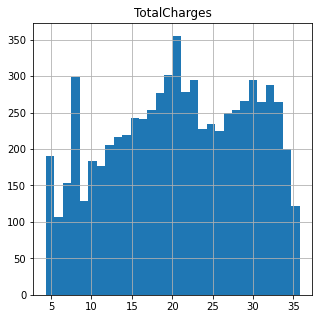

In [15]:
# Visualize histogram of the only skewed feature after conversion:
df['TotalCharges'].hist(bins=30, figsize=(5,5))
plt.title('TotalCharges')
plt.show()

### `Detect outliers`

In [16]:
# Detect and Remove outliers with standard deviation:
from numpy.random import seed

seed(1)

data_mean, data_std = np.mean(df['TotalCharges']), np.std(df['TotalCharges'])

# identify outliers:
cut_off = data_std * 3      # data after [data_std * 3] considered outliers so we remove data after it 
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify & print outliers:
outliers = [x for x in df['TotalCharges'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# # remove outliers:
outliers_removed = [x for x in df['TotalCharges'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))       
# there is no outliers

Identified outliers: 0
Non-outlier observations: 7010


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

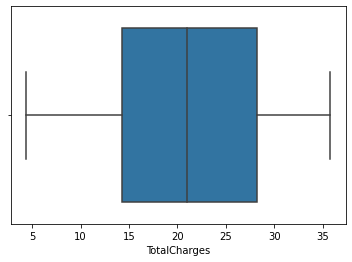

In [17]:
# Visualize Boxplot to check Whether there is outliers:
sns.boxplot(df['TotalCharges'])

### `categorical features countplot`

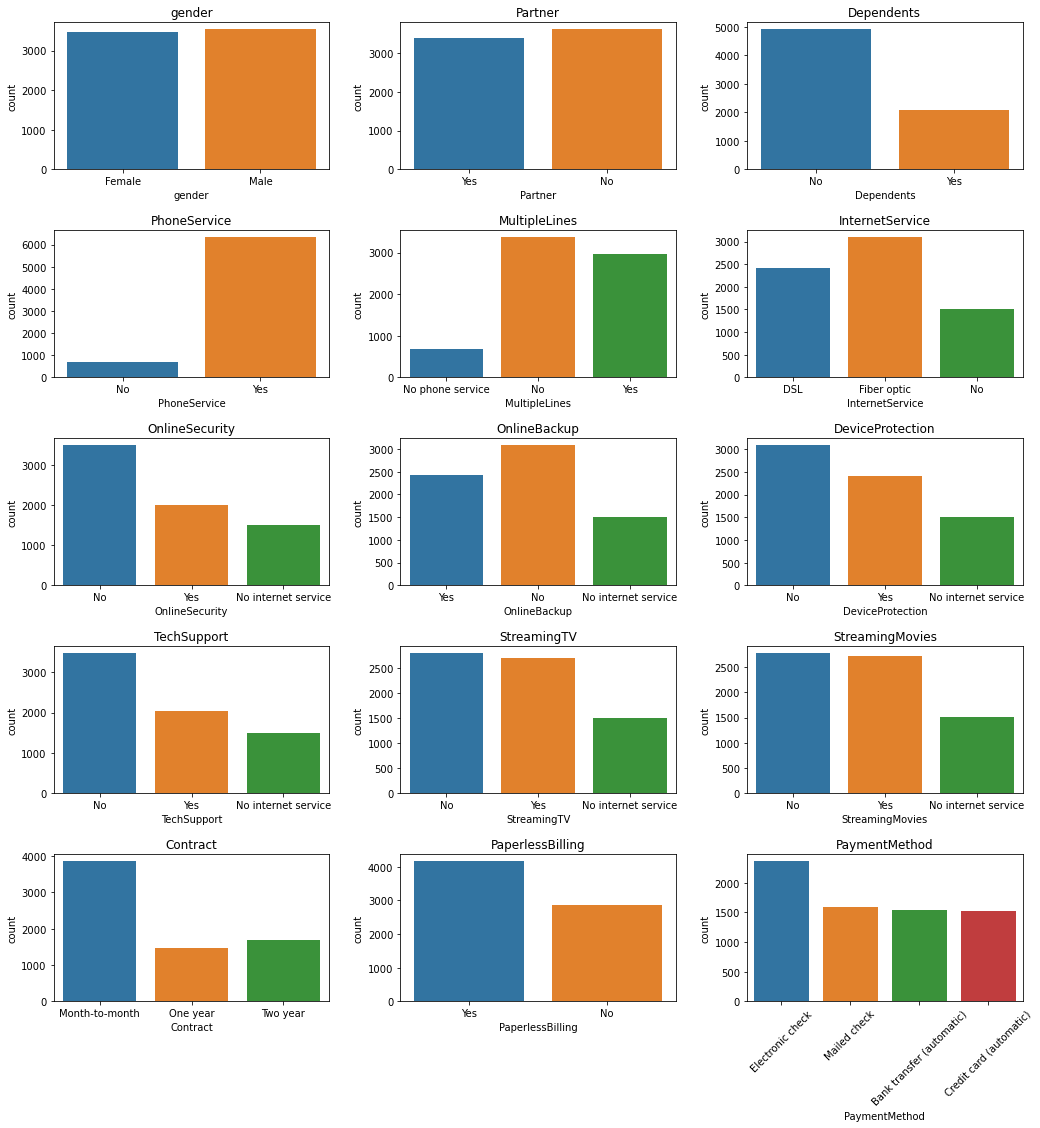

In [18]:
# plotting the countplot for all categorical columns using subplots

fig, ax = plt.subplots(5, 3, figsize=(15, 15))
fig.tight_layout(pad=4)  ## to avoid overlaping of titles in subplots (try comment it you will know)

plt.sca(ax[0,0])
sns.countplot(x='gender', data=df)
plt.title('gender')

plt.sca(ax[0,1])
sns.countplot(x='Partner', data=df)
plt.title('Partner')

plt.sca(ax[0,2])
sns.countplot(x='Dependents', data=df)
plt.title('Dependents')

plt.sca(ax[1,0])
sns.countplot(x='PhoneService', data=df)
plt.title('PhoneService')

plt.sca(ax[1,1])
sns.countplot(x='MultipleLines', data=df)
plt.title('MultipleLines')

plt.sca(ax[1,2])
sns.countplot(x='InternetService', data=df)
plt.title('InternetService')

plt.sca(ax[2,0])
sns.countplot(x='OnlineSecurity', data=df)
plt.title('OnlineSecurity')

plt.sca(ax[2,1])
sns.countplot(x='OnlineBackup', data=df)
plt.title('OnlineBackup')

plt.sca(ax[2,2])
sns.countplot(x='DeviceProtection', data=df)
plt.title('DeviceProtection')

plt.sca(ax[3,0])
sns.countplot(x='TechSupport', data=df)
plt.title('TechSupport')

plt.sca(ax[3,1])
sns.countplot(x='StreamingTV', data=df)
plt.title('StreamingTV')

plt.sca(ax[3,2])
sns.countplot(x='StreamingMovies', data=df)
plt.title('StreamingMovies')

plt.sca(ax[4,0])
sns.countplot(x='Contract', data=df)
plt.title('Contract')

plt.sca(ax[4,1])
sns.countplot(x='PaperlessBilling', data=df)
plt.title('PaperlessBilling')

plt.sca(ax[4,2])
sns.countplot(x='PaymentMethod', data=df)
plt.title('PaymentMethod')
plt.xticks(rotation=45);

### `Using OneHotEncoder`

In [19]:
# Using OneHotEncoder Encoding to convert categrical feature to numerical

import category_encoders as ce

cat_feat = df[['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

# Create object from OneHotEncoder:
encoder = ce.OneHotEncoder(cols=cat_feat,handle_unknown='return_nan',return_df=True,use_cat_names=True)

# OneHotEncoder data:
encoder = encoder.fit_transform(df)

df = encoder

df

C:\anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender_Female,gender_Male,SeniorCitizen,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,tenure,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0,1.0,0.0,1.0,0.0,1,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,29.85,5.405675,No
1,0.0,1.0,0,0.0,1.0,1.0,0.0,34,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,56.95,22.969625,No
2,0.0,1.0,0,0.0,1.0,1.0,0.0,2,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,53.85,9.033910,Yes
3,0.0,1.0,0,0.0,1.0,1.0,0.0,45,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42.30,22.790755,No
4,1.0,0.0,0,0.0,1.0,1.0,0.0,2,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,70.70,10.201547,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0,1.0,0.0,0.0,1.0,24,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84.80,23.329542,No
7039,1.0,0.0,0,1.0,0.0,0.0,1.0,72,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,103.20,34.135282,No
7040,1.0,0.0,0,1.0,0.0,0.0,1.0,11,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,29.60,13.517555,No
7041,0.0,1.0,1,1.0,0.0,1.0,0.0,4,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,74.40,12.981941,Yes


In [20]:
df['Churn'].replace(['No', 'Yes'], [0,1], inplace=True)


In [21]:
# Check Datatypes of Features
df.dtypes

gender_Female                              float64
gender_Male                                float64
SeniorCitizen                                int64
Partner_Yes                                float64
Partner_No                                 float64
Dependents_No                              float64
Dependents_Yes                             float64
tenure                                       int64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No phone service             float64
MultipleLines_No                           float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
OnlineSecurity_No                          float64
OnlineSecurity_Yes                         float64
OnlineSecurity_No internet service         float64
OnlineBackup_Yes               

### `Study the Correlation`

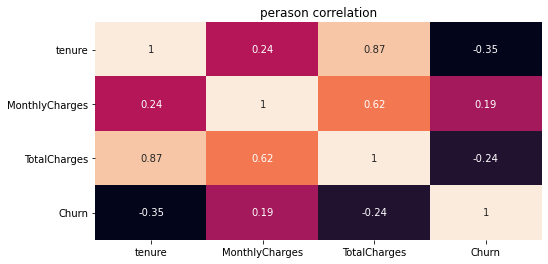

In [22]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr(), annot=True, cbar=False)  ## Linear correlation
plt.title('perason correlation');

### =========================================================================================

# `Model Building`

In [23]:
# slicing:

x = df.iloc[:, :-1]
y = df['Churn']

In [24]:
# Split data:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [25]:
# scalling train data:

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

## Logistic Regression [LR]

In [26]:
LR = LogisticRegression(random_state=42, n_jobs=-1)
LR.fit(x_train, y_train)
y_pre = LR.predict(x_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, LR.predict(x_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.802960057061341
Accuracy_score on test :  0.8259629101283881


In [27]:
# Logistic Regression after scaled data:

LR = LogisticRegression(random_state=42, n_jobs=-1, C=0.009, max_iter=7000)
LR.fit(x_train_scaler, y_train)
y_pre = LR.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, LR.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8026034236804565
Accuracy_score on test :  0.8288159771754636


### `Choosing a Metric`

 TN: 989 
 FP: 92 
 FN: 148 
 TP: 173
***********************************
Recall Accuracy:  0.5389408099688473
***********************************
Precision Accuracy:  0.6528301886792452
***********************************
f1 score:  0.5904436860068258
***********************************
AUC:  0.7972916504563388
***********************************


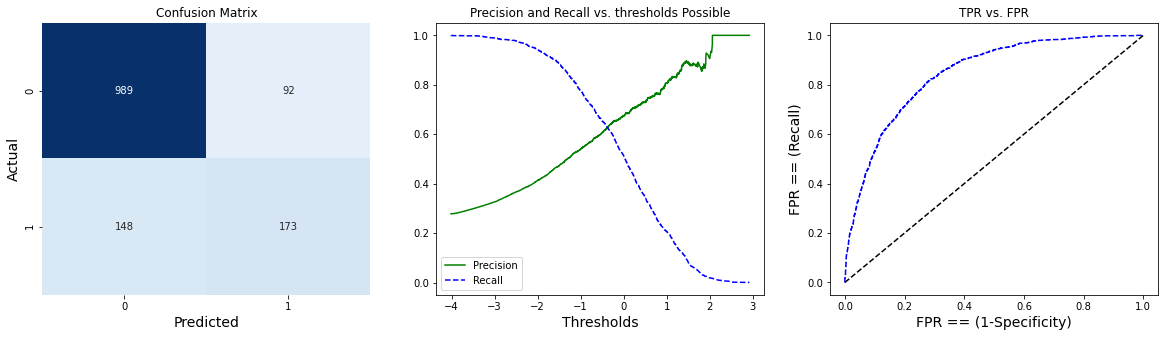

In [28]:
def decision_func(model):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    ## Confusion Matrix
    confus_model = confusion_matrix(y_test, y_pre)

    # plot it
    plt.sca(ax[0])
    sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title('Confusion Matrix')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
    print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
    print('*******'*5)
    print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
    print('*******'*5)
    print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
    print('*******'*5)
    print( 'f1 score: ', f1_score(y_test, y_pre) )


    # for precision_recall curve
    y_decision_cross = cross_val_predict(model, x_train, y_train, 
                                     cv=6, method='decision_function', n_jobs=-1)

    precision_val, recalls_val, thresholds_vals = precision_recall_curve(y_train, 
                                                                      y_decision_cross)

    ## roc_auc curve
    fpr, tpr, thresholds = roc_curve(y_train, y_decision_cross)
    print('*******'*5) 
    print('AUC: ', roc_auc_score(y_test.values, model.predict_proba(x_test)[:, 1], multi_class='ovr'))
    print('*******'*5)


    # plot precison_recall curve
    plt.sca(ax[1])
    plt.plot(thresholds_vals, precision_val[:-1], 'g-', label='Precision')
    plt.plot(thresholds_vals, recalls_val[:-1], 'b--', label='Recall')
    plt.title('Precision and Recall vs. thresholds Possible')
    plt.xlabel('Thresholds', fontsize=14)
    plt.legend()

    ## plot roc_curve
    plt.sca(ax[2])
    plt.plot(fpr, tpr, 'b--')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('TPR vs. FPR')
    plt.xlabel('FPR == (1-Specificity)', fontsize=14)
    plt.ylabel('FPR == (Recall)', fontsize=14)
    plt.show()

decision_func(LR)

## Support Vector Machine(SVM)

In [29]:
svm_model = SVC(kernel='poly', degree = 2)
svm_model.fit(x_train_scaler, y_train)
y_pre = svm_model.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, svm_model.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8036733238231099
Accuracy_score on test :  0.8138373751783167


In [30]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_scaler, y_train)
y_pre = svm_model.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, svm_model.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.7986804564907275
Accuracy_score on test :  0.8174037089871612


In [31]:
svm_model = SVC(kernel='rbf', gamma=0.001, probability=True)     
svm_model.fit(x_train_scaler, y_train)
y_pre = svm_model.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, svm_model.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8031383737517832
Accuracy_score on test :  0.8273894436519258


 TN: 993 
 FP: 88 
 FN: 154 
 TP: 167
***********************************
Recall Accuracy:  0.5202492211838006
***********************************
Precision Accuracy:  0.6549019607843137
***********************************
f1 score:  0.5798611111111109
***********************************
AUC:  0.6740672217082948
***********************************


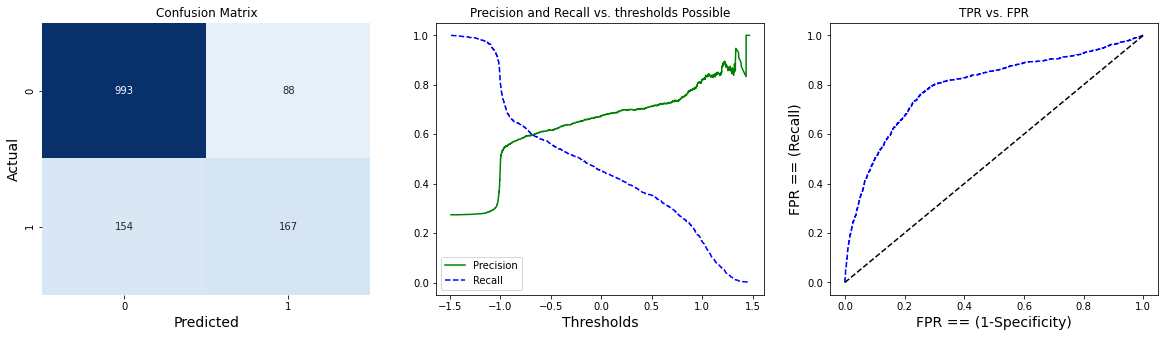

In [32]:
# call decision_func 
decision_func(svm_model)

## KNN Classifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pre = knn.predict(x_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, knn.predict(x_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8632310984308131
Accuracy_score on test :  0.7796005706134094


In [34]:
# Knn after scaled data:

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_scaler, y_train)
y_pre = knn.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, knn.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8141940085592011
Accuracy_score on test :  0.7710413694721826


 TN: 940 
 FP: 141 
 FN: 180 
 TP: 141
***********************************
Recall Accuracy:  0.4392523364485981
***********************************
Precision Accuracy:  0.5
***********************************
f1 score:  0.4676616915422886
***********************************
AUC:  0.5553755146371333
***********************************


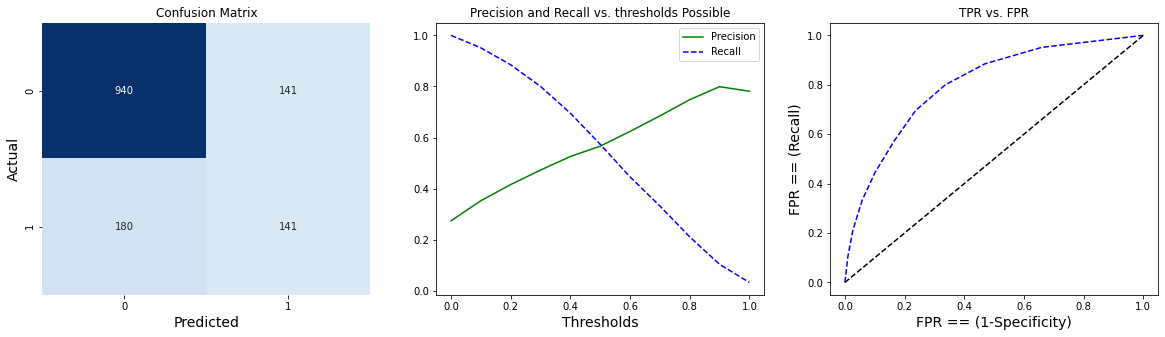

In [35]:
def predict_proba_func(model):
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    ## Confusion Matrix
    confus_model = confusion_matrix(y_test, y_pre)

    # plot it
    plt.sca(ax[0])
    sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title('Confusion Matrix')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
    print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
    print('*******'*5)
    print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
    print('*******'*5)
    print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
    print('*******'*5)
    print( 'f1 score: ', f1_score(y_test, y_pre) )


    # for precision_recall curve
    y_decision_cross = cross_val_predict(model, x_train, y_train, 
                                     cv=6, method='predict_proba', n_jobs=-1)

    precision_val, recalls_val, thresholds_vals = precision_recall_curve(y_train, 
                                                                      y_decision_cross[:,1])

    ## roc_auc curve
    fpr, tpr, thresholds = roc_curve(y_train, y_decision_cross[:,1])
    print('*******'*5) 
    print('AUC: ', roc_auc_score(y.values, model.predict_proba(x)[:, 1], multi_class='ovr'))
    print('*******'*5)


    # plot precison_recall curve
    plt.sca(ax[1])
    plt.plot(thresholds_vals, precision_val[:-1], 'g-', label='Precision')
    plt.plot(thresholds_vals, recalls_val[:-1], 'b--', label='Recall')
    plt.title('Precision and Recall vs. thresholds Possible')
    plt.xlabel('Thresholds', fontsize=14)
    plt.legend()

    ## plot roc_curve
    plt.sca(ax[2])
    plt.plot(fpr, tpr, 'b--')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('TPR vs. FPR')
    plt.xlabel('FPR == (1-Specificity)', fontsize=14)
    plt.ylabel('FPR == (Recall)', fontsize=14)
    plt.show()

predict_proba_func(knn)

## Decision Tree

In [36]:
# Using decision Tree Classifer

DT = DecisionTreeClassifier(max_depth=5, random_state=42)
DT.fit(x_train, y_train)
y_pre = DT.predict(x_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, DT.predict(x_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.795827389443652
Accuracy_score on test :  0.8031383737517832


In [37]:
# Using decision Tree Classifer after scale data

DT = DecisionTreeClassifier(max_depth=6)
DT.fit(x_train_scaler, y_train)
y_pre = DT.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, DT.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.80688302425107
Accuracy_score on test :  0.8174037089871612


 TN: 972 
 FP: 109 
 FN: 147 
 TP: 174
***********************************
Recall Accuracy:  0.5420560747663551
***********************************
Precision Accuracy:  0.6148409893992933
***********************************
f1 score:  0.5761589403973509
***********************************
AUC:  0.6440315155383656
***********************************


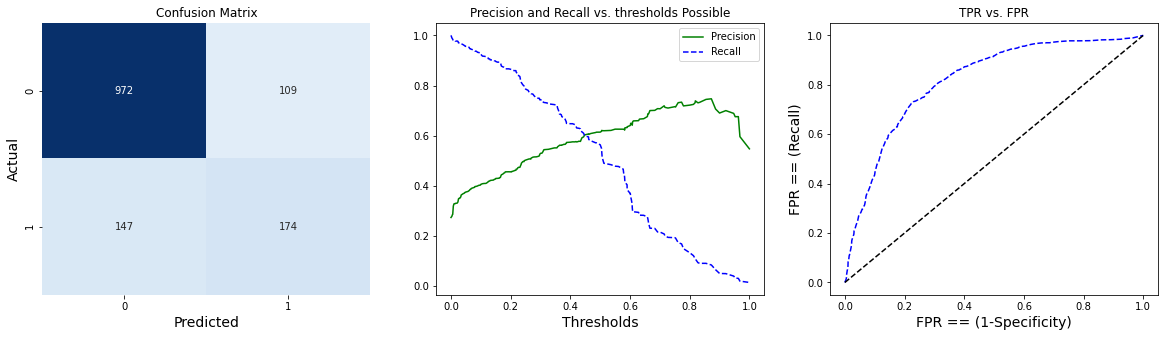

In [38]:
# call predict_proba_func 
predict_proba_func(DT)

## Random Forest

In [39]:
RF = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
RF.fit(x_train, y_train)
y_pre = RF.predict(x_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, RF.predict(x_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.7261055634807418
Accuracy_score on test :  0.7710413694721826


In [40]:
# Using Random Forest after scale data

RF = RandomForestClassifier(n_estimators=100, max_depth = 7)
RF.fit(x_train_scaler, y_train)
y_pre = RF.predict(x_test_scaler)

print( 'Accuracy_score on train : ', accuracy_score(y_train, RF.predict(x_train_scaler)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )

Accuracy_score on train :  0.8143723252496433
Accuracy_score on test :  0.8266761768901569


 TN: 994 
 FP: 87 
 FN: 156 
 TP: 165
***********************************
Recall Accuracy:  0.514018691588785
***********************************
Precision Accuracy:  0.6547619047619048
***********************************
f1 score:  0.5759162303664921
***********************************
AUC:  0.8007676462655242
***********************************


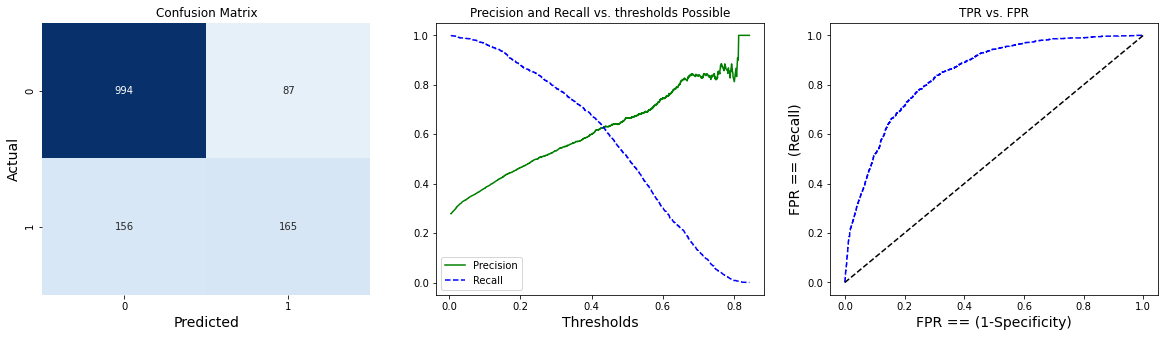

In [41]:
# call predict_proba_func 
predict_proba_func(RF)